# Regression

## House Pricing Regression using Dense Neural Networks

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

2024-02-22 16:52:56.220610: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 16:52:58.129796: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 16:52:58.131891: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-22 16:53:03.069976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Importing the dataset

In [7]:
data = tf.keras.datasets.boston_housing

## Separating the train and test data in diferent variables

(x_train, y_train), (x_val, y_val) = data.load_data()   # load_data is a function, remember the () in the end.

In [8]:
print(x_train.shape)
print(y_train.shape)
#note that this part of the data will be bigger than the validaion data. AI need as data as possible in the training.
#note that we have 13 columns in the dataset. The meaning of this is that we have 13 features on the data.

(404, 13)
(404,)


In [4]:
print(x_val.shape)
print(y_val.shape)
#note that this dataset is smaller than the training dataset. 

(102, 13)
(102,)


In [5]:
# Only the first 10 options
for i in range(10):
   print(f'Given to the model: {x_train[i,0]},  {x_train[i,1]}, {x_train[i,2]},  {x_train[i,3]}, {x_train[i,4]},  {x_train[i,5]},  {x_train[i,6]},  {x_train[i,7]},  {x_train[i,8]},  {x_train[i,9]},  {x_train[i,10]},  {x_train[i,11]},  {x_train[i,12]}')
   print(f'Answer: {y_train[i]}')

Given to the model: 1.23247,  0.0, 8.14,  0.0, 0.538,  6.142,  91.7,  3.9769,  4.0,  307.0,  21.0,  396.9,  18.72
Answer: 15.2
Given to the model: 0.02177,  82.5, 2.03,  0.0, 0.415,  7.61,  15.7,  6.27,  2.0,  348.0,  14.7,  395.38,  3.11
Answer: 42.3
Given to the model: 4.89822,  0.0, 18.1,  0.0, 0.631,  4.97,  100.0,  1.3325,  24.0,  666.0,  20.2,  375.52,  3.26
Answer: 50.0
Given to the model: 0.03961,  0.0, 5.19,  0.0, 0.515,  6.037,  34.5,  5.9853,  5.0,  224.0,  20.2,  396.9,  8.01
Answer: 21.1
Given to the model: 3.69311,  0.0, 18.1,  0.0, 0.713,  6.376,  88.4,  2.5671,  24.0,  666.0,  20.2,  391.43,  14.65
Answer: 17.7
Given to the model: 0.28392,  0.0, 7.38,  0.0, 0.493,  5.708,  74.3,  4.7211,  5.0,  287.0,  19.6,  391.13,  11.74
Answer: 18.5
Given to the model: 9.18702,  0.0, 18.1,  0.0, 0.7,  5.536,  100.0,  1.5804,  24.0,  666.0,  20.2,  396.9,  23.6
Answer: 11.3
Given to the model: 4.0974,  0.0, 19.58,  0.0, 0.871,  5.468,  100.0,  1.4118,  5.0,  403.0,  14.7,  396.9,  26

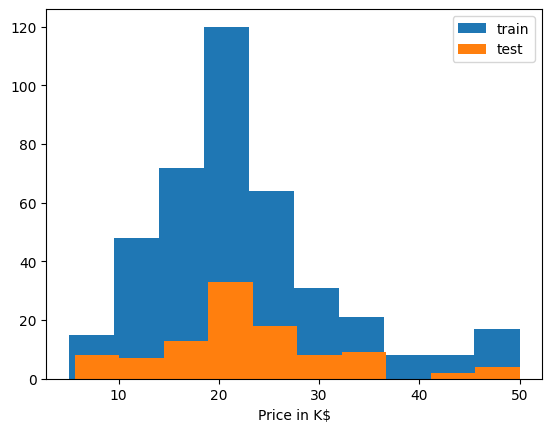

In [9]:
# It is also important that the validation dataset be proportional to the train dataset.
plt.hist(y_train, label='train')
plt.hist(y_val, label = 'test')
plt.xlabel('Price in K$')
plt.legend()

In [10]:
# discover the range of each feature that correspond to a label
for i in range(len(x_train[0])):
    print("Feature {} ==> range from {} to {}".format(
     i, x_train[:,i].min(), x_train[:,i].max()
    )
)


Feature 0 ==> range from 0.00632 to 88.9762
Feature 1 ==> range from 0.0 to 100.0
Feature 2 ==> range from 0.46 to 27.74
Feature 3 ==> range from 0.0 to 1.0
Feature 4 ==> range from 0.385 to 0.871
Feature 5 ==> range from 3.561 to 8.725
Feature 6 ==> range from 2.9 to 100.0
Feature 7 ==> range from 1.1296 to 10.7103
Feature 8 ==> range from 1.0 to 24.0
Feature 9 ==> range from 188.0 to 711.0
Feature 10 ==> range from 12.6 to 22.0
Feature 11 ==> range from 0.32 to 396.9
Feature 12 ==> range from 1.73 to 37.97


### Normalizing the data

This is a procedure we do when we have to set an equivalent scale on each feature of a dataset. In this way the model will perform better

In [11]:
# To normalize, you will have to divide the maximum range of the feature by the actual value of the feature
# In this case it is not padronized (like some images datasets, that we can only all features by divide by 255).
# In this case we can use the lib below
from sklearn.preprocessing import StandardScaler
# You create the object
scaler = StandardScaler()

# Use ONLY the TRAIN dataset below.
scaler.fit(x_train)

# Below we have the normalized data.
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)

In [12]:
i = 0
print(f'Before normalization: {x_train[i,0]},  {x_train[i,1]}, {x_train[i,2]},  {x_train[i,3]}, {x_train[i,4]},  {x_train[i,5]},  {x_train[i,6]},  {x_train[i,7]},  {x_train[i,8]},  {x_train[i,9]},  {x_train[i,10]},  {x_train[i,11]},  {x_train[i,12]}')
print(f'After normalization: {x_train_norm[i,0]},  {x_train_norm[i,1]}, {x_train_norm[i,2]},  {x_train_norm[i,3]}, {x_train_norm[i,4]},  {x_train_norm[i,5]},  {x_train_norm[i,6]},  {x_train_norm[i,7]},  {x_train_norm[i,8]},  {x_train_norm[i,9]},  {x_train_norm[i,10]},  {x_train_norm[i,11]},  {x_train_norm[i,12]}')

Before normalization: 1.23247,  0.0, 8.14,  0.0, 0.538,  6.142,  91.7,  3.9769,  4.0,  307.0,  21.0,  396.9,  18.72
After normalization: -0.27224633436918744,  -0.4836154708652843, -0.435761610917923,  -0.2568327484687563, -0.16522660145463205,  -0.17644260263626882,  0.8130618810863538,  0.11669830334066417,  -0.6262490526587586,  -0.595170031037082,  1.1485004386235735,  0.44807713457179416,  0.8252201990576518


### Define the Model

In [14]:
x_train.shape[1]

13

In [15]:
input_shape = x_train.shape[1]
input_shape

13

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),                 # O numero de entradas é o número de neurônios de entrada
    tf.keras.layers.Dense(20, activation='relu'),       
    tf.keras.layers.Dense(1)                            # Regressão tem só uma saída
])

In [21]:
model.summary()

# 280 é 20x13 dos w  + 20 dos b, é um b por neuronio que recebe.
# 21 é 20 w das chegadas + o b no neuronio de saida

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [22]:
model.compile(
    optimizer= 'adam',
    loss= 'mse',
    metrics=['mae']
)

In [23]:
history = model.fit(
    x_train_norm,
    y_train,
    epochs = 1000,
    verbose = 0
)

In [25]:
train_eval= model.evaluate(x_train_norm, y_train)
print("Training data MAE: {:.2}".format(train_eval[1]))

 1/13 [=>............................] - ETA: 0s - loss: 3.4655 - mae: 1.3988

13/13 [==============================] - 0s 1ms/step - loss: 5.2098 - mae: 1.6203
Training data MAE: 1.6
